## scikit-learnを使ったロジスティック回帰と線形単回帰

ロジスティック回帰や回帰分析一般についての詳細は割愛。

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-colorblind')

データを準備する。有名なアヤメデータセットを使うが、seasbornをimportしておけば簡単にデータセットをロードできる。csvファイルも世の中に存在しているので、それをDLしてきてpandasで読み込んで使ってもよい。コメントアウトしているが、例えばカレントディレクトリのdataフォルダにあるiris.csvファイルを読み込む場合は下記のようにpd.read_csvを使って読み込めばよい。

In [2]:
#iris = pd.read_csv('./data/iris.csv')

ここでは、seaornについてくるデータセットを使っている。

In [3]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


説明変数(特徴量)として['sepal_length', 'sepal_width', 'petal_length', 'petal_width']の4つのカラムの値を使う。日本語ではそれぞれ「がく片長」、「がく片幅」、「花びら長」、「花びら幅」となる。
目的変数として'species'カラムの値を使う。日本語では「種」となり、セトサ(setosa)、バージカラー(versicolor)、バージニカ(virginica)という3種類のアヤメの種類がある。

In [5]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target_cols = ['species']

In [6]:
X = iris[feature_cols]

多重共線性を防ぐためにもとりあえずscatter matrixで説明変数(特徴量)間の相関を見てみる。(独立変数間の相関が高いと多重共線性を引き起こす（？）と言われているが、どうやってそれが起こっていることを知るのかは未だに分からない... 予測が不安定になったりそもそも回帰分析が行えないということなので、おそらく今回は大丈夫なのだと思われる) とりあえずここでは独立変数間に線形依存性（linear dependency）が認められないのでよしとした。なお、花びらの長さと花びらの幅に関しては高い正の相関がありそうな雰囲気が感じ取られてはいる。

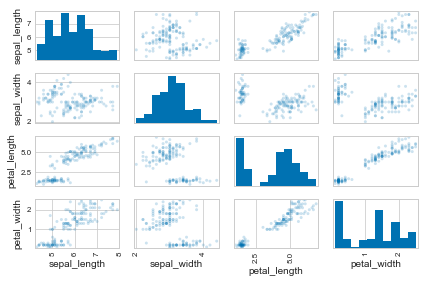

In [7]:
axes = pd.plotting.scatter_matrix(X, alpha=0.2)
plt.tight_layout()

特徴量間の相関係数を計算してみると、たしかに花びらの長さと花びらの幅の間には高い正の相関が見られる。

In [10]:
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [33]:
Y = iris[target_cols]

種ごとのがく片長、がく片幅を見てみる。

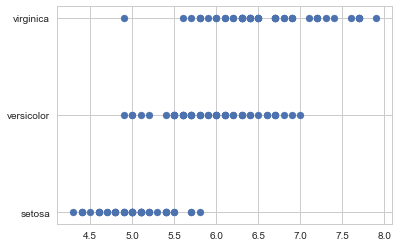

In [71]:
plt.scatter(X['sepal_length'],Y)

種ごとにがく片の長さというのは違うっぽいことがわかる。セトサは小型、バージカラーは中型、バージニカは大型の種なのではないかという予測ができる。

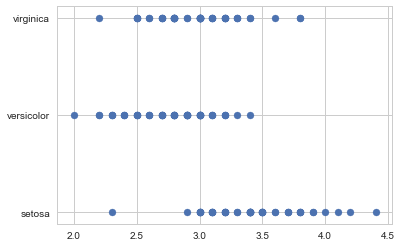

In [72]:
plt.scatter(X['sepal_width'],Y)

がく幅に関してもプロットしてみると、先程の予想が外れていることがわかる。がく幅に関しては、セトサが大きめの個体が多い種のようである。

In [211]:
#Y['species'].value_counts()

In [96]:
#for y in Y['species']:
#    print(y)

アヤメの種ごとに色分けしてプロットしてみる。

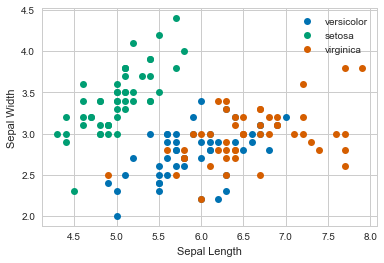

In [105]:
names = set(iris['species'])
for name in names:
    cond = iris['species'] == name
    plt.plot(X['sepal_length'][cond], X['sepal_width'][cond], linestyle='none', marker='o', label=name)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(numpoints=1)
plt.show()

ロジスティック回帰を行う。バリデーション（検証）には5-foldを使う。

In [34]:
kfold_cv = model_selection.KFold(n_splits=5, shuffle=True)

In [44]:
clf = LogisticRegression()

In [45]:
scores = cross_val_score(clf,X,Y,cv=kfold_cv)

/home/ksn/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ksn/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ksn/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ksn/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

In [46]:
print(scores)

[0.96666667 0.93333333 0.96666667 0.96666667 0.93333333]


KfoldでK=5としたので上で5通りの正解率(訓練データに対して学習したモデルがテストデータでも予測できた確率)が出ている。一般的にはこのクロスバリデーションの結果の平均をもとにモデルの良さを比べるらしい。

In [48]:
print(np.mean(scores))

0.9533333333333334


95.3%とわりと高い値になっている。  
（と思ったが、どうやら分類問題の予測としてはそれほど高いというわけではないらしく、ここから数％上げていくのにいろいろなアプローチが取られるらしい。もちろん、問題によって高い低いというのは変わっていくはずではあるわけで、しばしば見かけるのは「予測できなかったときの結果が致命的なものに関してはかなり高い予測率が求められる」というもの）

ついでに線形回帰も行ってみる。
使うデータはバーシクルという種のがく片長とがく片幅のカラムを用いる。

In [230]:
x = iris[iris['species']=='versicolor']['sepal_length']
y = iris[iris['species']=='versicolor']['sepal_width']

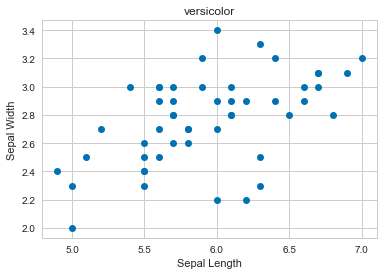

In [231]:
plt.plot(x, y, linestyle='none', marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('versicolor')
plt.show()

上記のグラフを見た限りでは、若干の正の相関がありそうな雰囲気が感じ取られる。実際に回帰分析を行い、その回帰直線を求めてプロットに重ねてみる。

ここでは簡単のためクロスバリデーションは行わない。もともともアヤメデータセットの80%を訓練データに20%をテストデータに分けて学習を行う。引数をshuffle=Trueにすることで分割前にデータをシャッフルするようにしている。

In [232]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8, shuffle=True)

In [233]:
x_train.shape

(40,)

In [234]:
x_train = x_train.reshape(-1,1) # 列ベクトルにしている
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

/home/ksn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/home/ksn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/ksn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ksn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [235]:
x_train.shape

(40, 1)

訓練データをモデルにfitさせるときにデータが列ベクトルである必要があるのでreshape(-1,1)で40行1列の列ベクトルにしている。

ここで、少しreshapeの使い方を見てみる。まず3X4の行列を準備する。

In [236]:
z = np.array([[1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]])
z.shape

(3, 4)

zを行ベクトルにしてみる。1つめの引数で行数を、2つめの引数で列数を指定する。-1を引数に取ると、元の形状から推測して列や行を決めてくれる。   
まずは行ベクトルにする方法。

In [237]:
z.reshape(1,-1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

続いて列ベクトルにする方法。

In [238]:
z.reshape(-1,1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

話を戻して、線形回帰を行う。  

In [239]:
clf_linear = LinearRegression()

In [240]:
reg = clf_linear.fit(x_train,y_train)

回帰式の切片と係数は次のようにして得られる。

In [241]:
reg.intercept_[0]

0.6968555040106033

In [242]:
reg.coef_[0][0]

0.35185904613908003

最後に、得られた回帰直線を散布図上にプロットしてみる。

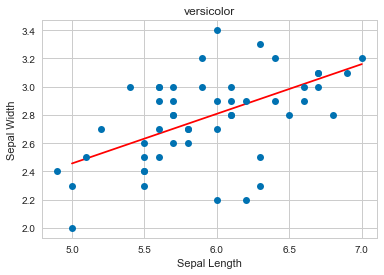

In [243]:
from matplotlib import lines

fig = plt.figure()
ax = fig.add_subplot(111)
slope = clf_linear.coef_[0][0]
intercept = clf_linear.intercept_[0]
func = lambda x: x * slope + intercept
line = lines.Line2D([5, 7], [func(5), func(7)], color='r')
ax.add_line(line)
plt.plot(x, y, linestyle='none', marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('versicolor')
plt.show()

あとはR^2を求めることと誤差の正規性の検定（Kolmogorov-Smirnov検定かShapiro-Wilk検定）と相関係数の有意性の検定を行いたいのだが、scikit-learnで簡単にできるのだろうか。Rなら簡単に出来そうだがPythonだとそれなりに厄介だなあと思い始めている。

statsmodels.apiを使えば検定結果等を見ることが出来るようなので、そちらで計算してみる。

In [244]:
import statsmodels.api as sm
from scipy import stats

x2_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x2_train)
estimation = model.fit()
print(estimation.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     20.72
Date:                Sun, 20 Jan 2019   Prob (F-statistic):           5.32e-05
Time:                        07:52:56   Log-Likelihood:                -1.1722
No. Observations:                  40   AIC:                             6.344
Df Residuals:                      38   BIC:                             9.722
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6969      0.460      1.515      0.1

先に計算した回帰式および係数と切片の値が同じになった。P値(5%とする)を見ると係数は有意、切片は有意ではないという結果だった。

ダービン=ワトソン比の値は2よりやや小さいので誤差項間には正の相関があるかもしれないことが見て取れる。

R^2は0.353となっており、回帰式の当てはまりはあまりよくないものであると思われる。

最後に、Rでやってみる。

観測データを訓練データとテストデータに分けてないので若干結果は異なるが、回帰係数に関してはわりと近い値になっている。切片の値は結構違う。

```
>iris_versicolor <- subset(iris,iris\$Species=='versicolor')  

>res <- lm(iris_versicolor\$Sepal.Width ~ iris_versicolor\$Sepal.Length)

Call:
lm(formula = iris_versicolor\$Sepal.Width ~ iris_versicolor\$Sepal.Length)

Coefficients:  
(Intercept)  0.8721                      
iris_versicolor\$Sepal.Length     0.3197  

> summary(res)

Call:  
lm(formula = iris_versicolor\$Sepal.Width ~ iris_versicolor\$Sepal.Length)  

Residuals:  
     Min       1Q   Median       3Q      Max   
-0.65441 -0.12958 -0.00849  0.15137  0.60954 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.87215    0.44466   1.961   0.0556 .     
iris_versicolor\$Sepal.Length  0.31972    0.07463   4.284 8.77e-05 ***   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2697 on 48 degrees of freedom
Multiple R-squared:  0.2766,	Adjusted R-squared:  0.2615 
F-statistic: 18.35 on 1 and 48 DF,  p-value: 8.772e-05
```

やはりこの線形単回帰モデルはあまり良いモデルではないっぽい。シンプルにがく片長とがく片幅には何の関係もないようにも見えてくるし、そもそも観測データのばらつきを見ていると線形単回帰モデルは少々荒っぽいようにも思われる。

References

https://stackoverflow.com/questions/9740806/pylab-map-labels-to-colors

https://akiyoko.hatenablog.jp/entry/2013/06/16/005946

すぐに使える! 業務で実践できる! Pythonによる AI・機械学習・深層学習アプリのつくり方